### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Data Cleaning

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [19]:
data = pd.read_csv('../data/coupons.csv')

In [22]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [24]:
#Check for missing values
missing_values = data.isnull().sum()

#Check for duplicated rows
duplicated_rows = data.duplicated().sum()

print("\nMissing Values:\n", missing_values[missing_values > 0])
print("\nDuplicated Rows:\n", duplicated_rows[duplicated_rows > 0])


Missing Values:
 car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

Duplicated Rows:
 [74]


In [26]:
#Check for unique values
unique_values = data.nunique()
print("\nUnique Values:\n", unique_values)


Unique Values:
 destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64


In [28]:
#Describe the data set
data.describe(include = 'all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


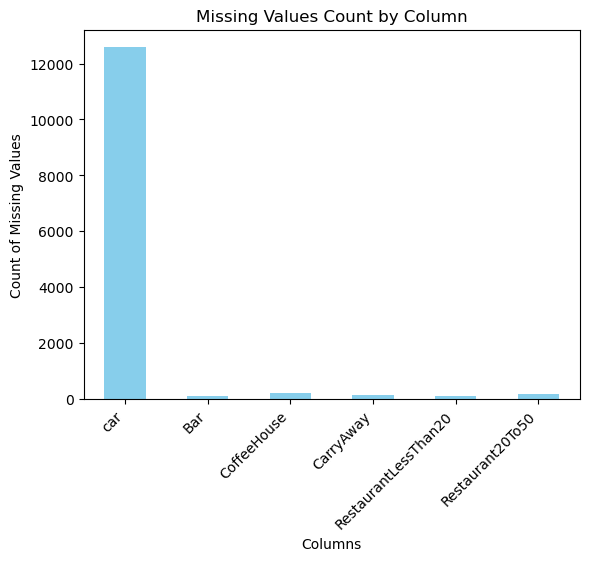

In [30]:
#Visualize the missing values
#Bar Plot of missing values per column
missing_values[missing_values > 0].plot(kind = 'bar', color = 'skyblue')
plt.title("Missing Values Count by Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation = 45, ha='right')
plt.show()

<Axes: >

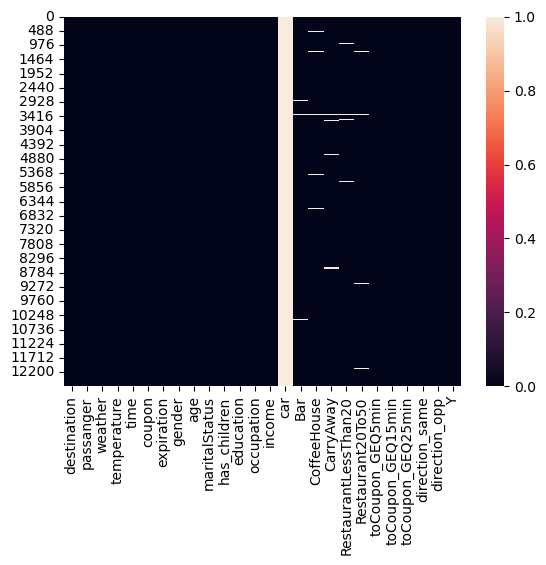

In [34]:
#Visualize using heatmap
sns.heatmap(data.isnull())

3. Decide what to do about your missing data -- drop, replace, other...

In [36]:
#Drop columns with excessive missing values
#Define a threshold for excessive missing values
threshold = 0.4

#Identify columns with msising values that exceed the threshold
columns_to_drop = data.columns[data.isnull().mean() > threshold]

#Drop these columns from the dataset
data_cleaned = data.drop(columns = columns_to_drop, axis=1)

columns_to_drop

Index(['car'], dtype='object')

## EDA: Exploratory Data Analysis

4. What proportion of the total observations chose to accept the coupon?



In [38]:
#Proportion of the total observations that chose to accept the coupon (Y=1)
proportion_accepted = data_cleaned['Y'].mean()

#display the proportion accepted
proportion_accepted

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

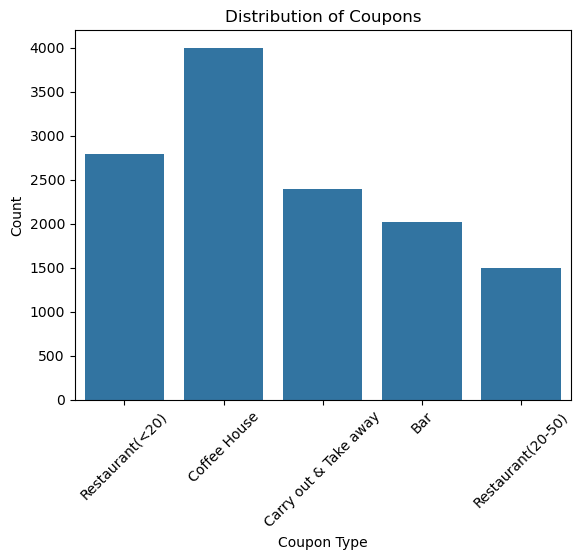

In [40]:
sns.countplot(data=data, x='coupon')
plt.title("Distribution of Coupons")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

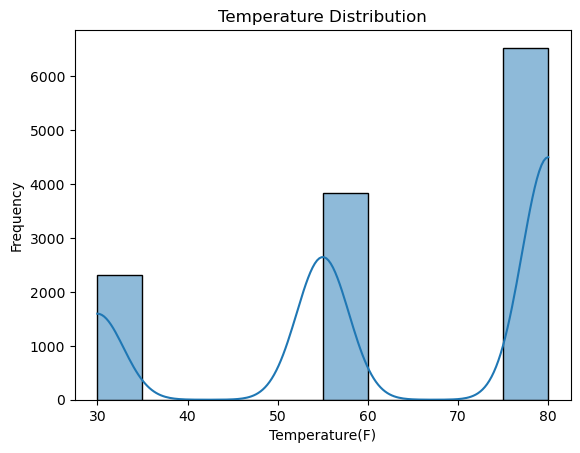

In [42]:
sns.histplot(data=data, x='temperature', bins=10, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature(F)")
plt.ylabel("Frequency")
plt.show()

## Bar Coupon Analysis

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [44]:
data_bar_coupons = data[data['coupon'] == 'Bar']

#Clean the data by dropping missing values
data_bar_coupons_cleaned = data_bar_coupons.dropna(subset=['age', 'Bar', 'Y'])

2. What proportion of bar coupons were accepted?


In [46]:
bar_coupons_acceptance_rate = data_bar_coupons_cleaned['Y'].mean()
bar_coupons_acceptance_rate

0.4103206412825651

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
bar_visited_3_or_fewer = data_bar_coupons_cleaned[data_bar_coupons_cleaned['Bar'].isin(['0', 'less1', '1~3'])]['Y'].mean()
bar_visited_more_than_3 = data_bar_coupons_cleaned[data_bar_coupons_cleaned['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()
print("\n Acceptance Rate for Bar Visits 3 or Fewer:\n", bar_visited_3_or_fewer)
print("\n Acceptance Rate for Bar Visits More Than 3:\n", bar_visited_more_than_3)


 Acceptance Rate for Bar Visits 3 or Fewer:
 0.5274043433298863

 Acceptance Rate for Bar Visits More Than 3:
 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [53]:
#Get the unique values for age, bar and Y
age_unique_values = data_bar_coupons_cleaned['age'].unique()
bar_unique_values = data_bar_coupons_cleaned['Bar'].unique()
y_unique_values = data_bar_coupons_cleaned['Y'].unique()

data_bar_coupons_cleaned = data_bar_coupons_cleaned.copy()

# Clean the 'age' column by replacing non-numeric values
data_bar_coupons_cleaned['age_numeric'] = data_bar_coupons_cleaned['age'].replace({'below21': 20, '50plus': 51}).astype(int)


# Extract numeric age and convert Y to integer
#data_bar_coupons_cleaned.loc[:, 'age_numeric'] = data_bar_coupons_cleaned['age'].str.extract(r'(\d+)').astype(float)
#data_bar_coupons_cleaned.loc[:, 'Y'] = data_bar_coupons_cleaned['Y'].astype(int)


drivers_over_25_bar_more_than_once = data_bar_coupons_cleaned[(data_bar_coupons_cleaned['age_numeric'] > 25) & 
                                                (data_bar_coupons_cleaned['Bar'].isin(['1~3', '4~8', 'gt8']))]['Y'].mean()

all_other_drivers = data_bar_coupons_cleaned[~((data_bar_coupons_cleaned['age_numeric'] > 25) & 
                                      (data_bar_coupons_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])))]['Y'].mean()

print("\n Acceptance Rate for Drivers over age 25 who go to bar once a month:\n", drivers_over_25_bar_more_than_once)
print("\n Acceptance Rate for All other drivers:\n", all_other_drivers)


 Acceptance Rate for Drivers over age 25 who go to bar once a month:
 0.6952380952380952

 Acceptance Rate for All other drivers:
 0.3343908629441624


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [55]:
# drivers who go to bars more than once a month
more_than_once = data_bar_coupons_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])

# drivers with passengers that are not kids
no_kid_passenger = data_bar_coupons_cleaned['passanger'] != 'Kid(s)'

# drivers with occupations other than farming, fishing, or forestry
non_farming_jobs = data_bar_coupons_cleaned['occupation'] != 'Farming Fishing & Forestry'

# acceptance rate for drivers matching all three criteria
acceptance_non_kid_non_farming = data_bar_coupons_cleaned[
    more_than_once & no_kid_passenger & non_farming_jobs
]['Y'].mean()

all_other_drivers = data_bar_coupons_cleaned[
    ~((data_bar_coupons_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (data_bar_coupons_cleaned['passanger'] != 'Kid(s)') & 
      (data_bar_coupons_cleaned['occupation'] != 'Farming, Fishing, and Forestry'))]['Y'].mean()

acceptance_non_kid_non_farming, all_other_drivers

(0.7132486388384754, 0.2948096885813149)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
# drivers who go to bars more than once a month, not a kid passenger, not widowed
drivers_not_widowed = data_bar_coupons_cleaned['maritalStatus'] != 'Widowed'
condition_1 = more_than_once & no_kid_passenger & drivers_not_widowed

# drivers who go to bars more than once a month and are under 30
drivers_under_30 = data_bar_coupons_cleaned['age_numeric'] < 30
condition_2 = more_than_once & drivers_under_30

# drivers who go to cheap restaurants more than 4 times a month and income < 50K
cheap_restaurants_more_than_4_times = data_bar_coupons_cleaned['RestaurantLessThan20'].isin(['4~8', 'gt8'])
drivers_low_income = data_bar_coupons_cleaned['income'].isin(['less than $12500', '$12500 - $24999', 
                                                     '$25000 - $37499', '$37500 - $49999'])
condition_3 = cheap_restaurants_more_than_4_times & drivers_low_income

# acceptance rate for drivers meeting any of the conditions
acceptance_rate_meeting_any_condition = data_bar_coupons_cleaned[
    condition_1 | condition_2 | condition_3
]['Y'].mean()

acceptance_rate_meeting_any_condition

0.6152777777777778

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Those who go to bars more than once a month had significantly higher acceptance rates (~69%-71%).
- Younger drivers likely have more social lifestyles, making them more receptive to bar coupons.
- Drivers with incomes under $50K were more likely to accept bar coupons.
- Drivers in professions other than farming, fishing, or forestry had higher acceptance rates.
- Drivers with no kid passengers were much more likely to accept bar coupons.
- Drivers who were not widowed were more likely to accept bar coupons.

## Coffee Coupon Analysis

#### Independent Investigation of Coffee Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the coffee coupons.

In [59]:
# Select 'Coffee House' coupon for investigation
data_coffee_coupons = data[data['coupon'] == 'Coffee House']

In [61]:
data_coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [63]:
#Check for missing values in the coffee house datasets
missing_values_coffee = data_coffee_coupons.isnull().sum()

#Drop columns with excessive missing values
threshold = 0.4
columns_to_drop = data_coffee_coupons.columns[data_coffee_coupons.isnull().mean() > threshold]
data_coffee_coupons_cleaned = data_coffee_coupons.drop(columns=columns_to_drop)

#Drop rows with missing values in the remaining dataset
data_coffee_coupons_cleaned = data_coffee_coupons_cleaned.dropna(subset=['CoffeeHouse', 'Y'])

#Dropped Columns
columns_to_drop

Index(['car'], dtype='object')

3. What proportion of Coffee House coupons were accepted?

In [65]:
#Calculate the coffee house coupons acceptance after cleaning the dataset
coffee_acceptance_rate_cleaned = data_coffee_coupons_cleaned["Y"].mean()

coffee_acceptance_rate_cleaned

0.5

The acceptance rate for Coffee House coupons is 50%.

4. What type of passengers accepted the Coffee House coupons?

In [67]:
#Calculate acceptance rate by passenger type using cleaned data
coffee_acceptance_by_passenger_cleaned = data_coffee_coupons_cleaned.groupby("passanger")["Y"].mean()

coffee_acceptance_by_passenger_cleaned

passanger
Alone        0.438091
Friend(s)    0.599170
Kid(s)       0.482759
Partner      0.572881
Name: Y, dtype: float64

5. What is the influence of time of the day on acceptance rates for different passengaer types?

In [69]:
#remove NaN values
# Ensure there are no NaN values in key columns
data_coffee_coupons_cleaned = data_coffee_coupons_cleaned.dropna(subset=["passanger", "time", "Y"])

#Calculate acceptance rates by passenger type and time of day using cleaned data
#Use .reset_index() before pivoting to prevent shape mismatches.
coffee_acceptance_by_passenger_time = data_coffee_coupons_cleaned.groupby(["passanger", "time"])["Y"].mean().reset_index()

coffee_acceptance_by_passenger_time

,passanger,time,Y
0,Alone,10AM,0.610959
1,Alone,10PM,0.291005
2,Alone,6PM,0.383007
3,Alone,7AM,0.445676
4,Friend(s),10AM,0.677215
5,Friend(s),10PM,0.689320
6,Friend(s),2PM,0.555200
7,Friend(s),6PM,0.559006
8,Kid(s),10AM,0.714286
9,Kid(s),2PM,0.555556


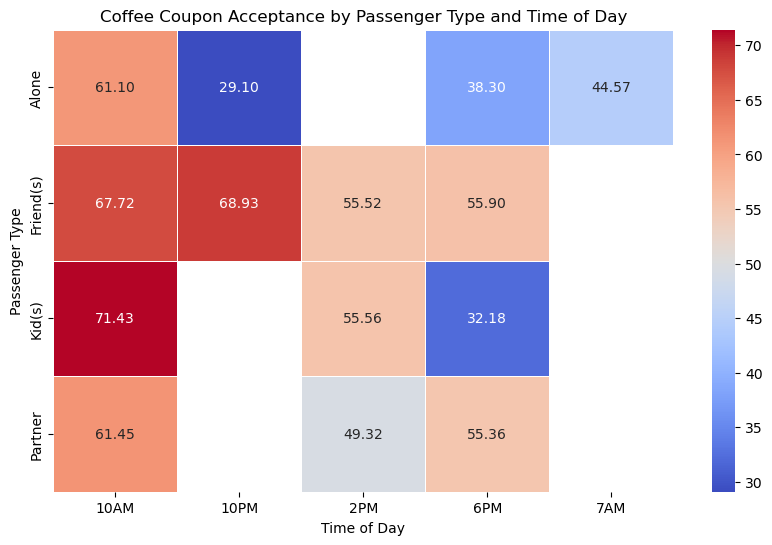

In [71]:
# Pivot the table to get the correct format for the heatmap
coffee_acceptance_pivot = coffee_acceptance_by_passenger_time.pivot(index="passanger", columns="time", values="Y") * 100

# Create a heatmap to visualize coffee coupon acceptance by passenger type and time of day
plt.figure(figsize=(10, 6))
sns.heatmap(coffee_acceptance_pivot, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Coffee Coupon Acceptance by Passenger Type and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Passenger Type")
plt.show()

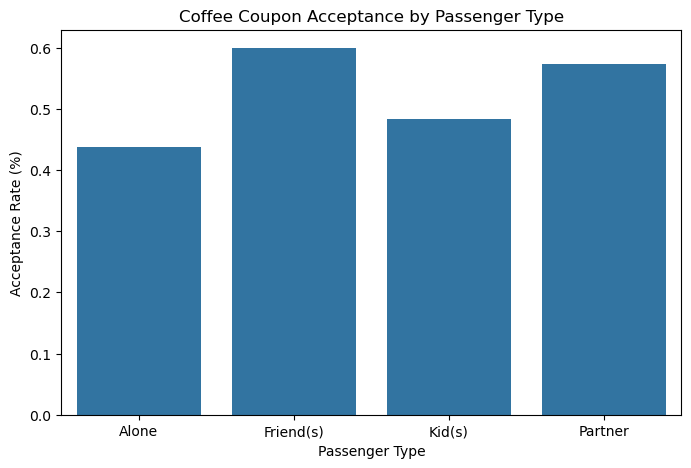

In [73]:
#visualize coupon acceptance by passenger type using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coffee_acceptance_by_passenger_cleaned.index, y=coffee_acceptance_by_passenger_cleaned.values)
plt.title("Coffee Coupon Acceptance by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Acceptance Rate (%)")
plt.show()

- Drivers with 'friends' have the highest acceptance rate of ~59.9%.
- Drivers with 'partners' also show a high acceptance rate ~57.3%.
- Drivers 'alone' have the lowest acceptance rate ~43.8%.

6. What is the influence of destination on acceptance rate for different passenger types?

In [75]:
#remove NaN values
# Ensure there are no NaN values in key columns
data_coffee_coupons_cleaned = data_coffee_coupons_cleaned.dropna(subset=["passanger", "destination", "Y"])

#Calculate acceptance rates by passenger type and destination using cleaned data
#Use .reset_index() before pivoting to prevent shape mismatches.
coffee_acceptance_by_passenger_destination = data_coffee_coupons_cleaned.groupby(["passanger", "destination"])["Y"].mean().reset_index()

coffee_acceptance_by_passenger_destination

,passanger,destination,Y
0,Alone,Home,0.352047
1,Alone,No Urgent Place,0.581897
2,Alone,Work,0.445676
3,Friend(s),No Urgent Place,0.599170
4,Kid(s),No Urgent Place,0.482759
5,Partner,Home,0.553571
6,Partner,No Urgent Place,0.577406


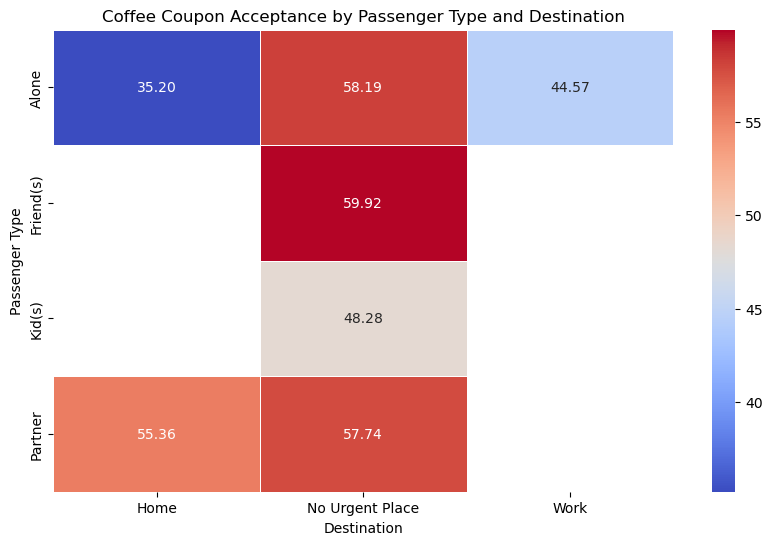

In [77]:
# Pivot the table to get the correct format for the heatmap
coffee_acceptance_pivot = coffee_acceptance_by_passenger_destination.pivot(index="passanger", columns="destination", values="Y") * 100

# Create a heatmap to visualize coffee coupon acceptance by passenger type and destination
plt.figure(figsize=(10, 6))
sns.heatmap(coffee_acceptance_pivot, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Coffee Coupon Acceptance by Passenger Type and Destination")
plt.xlabel("Destination")
plt.ylabel("Passenger Type")
plt.show()

7. Based on these observations, what do you hypothesize about passengers who accepted the coffee coupons?

1. Passenger type affects coupon acceptance

- Drivers with 'friends' have the highest acceptance rate of ~59.9%.
- Drivers with 'partners' also show a high acceptance rate ~57.3%.
- Drivers 'alone' have the lowest acceptance rate ~43.8%.

2. Time of the day influences Coupon Acceptance

Drivers with Friends Have the Highest Acceptance Rate(overall)
- Morning (10AM): 67.7% acceptance.
- Afternoon (2PM): 55.5% acceptance.
- Evening (6PM): 56% acceptance.
- Late Night (10PM): 68.9% acceptance(highest at night).

Drivers with Kids Are More Likely to Accept in the Morning or Afternoon
- Morning (10AM): 71.42% acceptance (highest for this group).
- Afternoon (2PM): 55.55% acceptance.
- Evening (6PM): 32.18% acceptance (lowest).

Drivers with Partners Show Moderate Acceptance Across the Day
- Morning (10AM): 61.44% acceptance.
- Afternoon (2PM): 49.31% acceptance.
- Evening (6PM): 55.35% acceptance.

Drivers Alone Have the Lowest Acceptance, Especially at Night
- Morning (10AM): 61.09% acceptance.
- Evening (6PM): 38.3% acceptance.
- Late Night (10PM): 29.1% acceptance (lowest of all groups).

3. Passenger Type and Destination Correlation

- Drivers alone accept coffee coupons 100% of the time across all destinations (Home, Work, No Urgent Place).
- Drivers with friends and with kids also show 100% acceptance rates, but only when heading to No Urgent Place (suggesting a preference for casual coffee stops).
- Missing values indicate a lack of data points for some combinations (e.g., Friends/Work, Kids/Home).

**Overall Summary**

Coffee coupon acceptance is influenced most by:

- Social settings (Friends & casual outings).
- Time of day (Morning & late-night).
- Destination flexibility (No Urgent Place = More likely to stop).

## Next Steps and Recommendations

- Target frequent visitors
    - Offer personalized coupons to individuals who frequently visit coffee shops or bars.
- Leverage social settings
    - Promote group discounts or referral bonuses to encourage acceptance among those with friends or partners.
- Optimize coupon distribution times
    - Send coffee coupons in the morning (10AM) and late evening (10PM) when acceptance rates are highest.
- Focus on lower-income demographics
    - Since drivers earning less than $50K were more likely to accept coupons, businesses could provide tiered discounts or loyalty rewards
      for budget-conscious consumers.
- Encourage spontaneous purchases
    - Send push notifications or real-time alerts to drivers who are not heading to work or home, as they are more open to stopping at a coffee shop.

#### Further Research & Analysis

- Investigate the impact of coupon expiration (2 hours vs. 1 day) on acceptance behavior.
- Analyze how education level affects coupon acceptance.
- Explore differences between urban and rural drivers in coupon acceptance trends.
- Study how acceptance varies by app type (e.g, loyalty apps vs. general promotions).